In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from sklearn.metrics import r2_score
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [10]:
r = [40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95, 97.5, 100]
I = [4.09, 3.28, 2.96, 2.1, 1.857, 1.694, 1.548, 1.41, 1.277, 1.148, 1.071, 1.008, 0.933, 0.862, 0.805, 0.752, 0.712, 0.69, 0.653, 0.63, 0.565, 0.549, 0.508, 0.457, 0.433]

In [11]:
data = pd.DataFrame({'distancia':r , 'intensidad' : I})

In [12]:
data

,distancia,intensidad
0,40.0,4.090
1,42.5,3.280
2,45.0,2.960
3,47.5,2.100
4,50.0,1.857
5,52.5,1.694
6,55.0,1.548
7,57.5,1.410
8,60.0,1.277
9,62.5,1.148


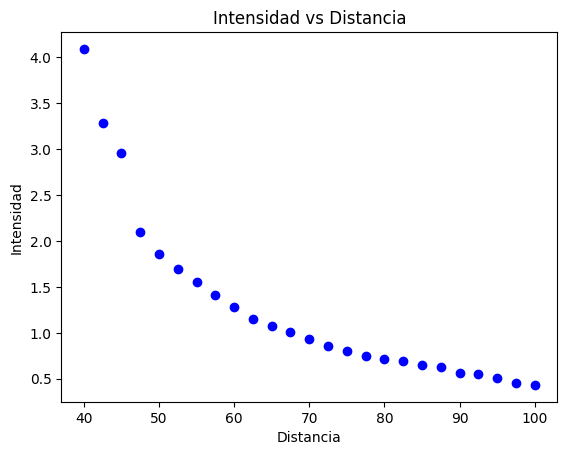

In [17]:
# Graficar los datos
plt.plot(data['distancia'], data['intensidad'], 'bo')
plt.xlabel('Distancia')
plt.ylabel('Intensidad')
plt.title('Intensidad vs Distancia')
plt.show()

In [14]:
# Definir la función del ajuste
def func(x, a, n):
    return a * x**n

In [15]:
# Realizar el ajuste y obtener los parámetros a y n
popt, pcov = curve_fit(func, r, I)
a, n = popt

In [27]:
print('a=', a)
print('n=', n)

a= 55903.79710798897
n= -2.6005099963298637


In [32]:
# Coeficiente de determinación (R^2)
residuals = I - func(r, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((I - np.mean(I))**2)
r_squared = 1 - (ss_res / ss_tot)


In [33]:
# Mostrar resultados
print(f'Coeficiente a: {popt[0]:.3f}')
print(f'Exponente n: {popt[1]:.3f}')
print(f'R^2: {r_squared:.3f}')

Coeficiente a: 55903.797
Exponente n: -2.601
R^2: 0.978


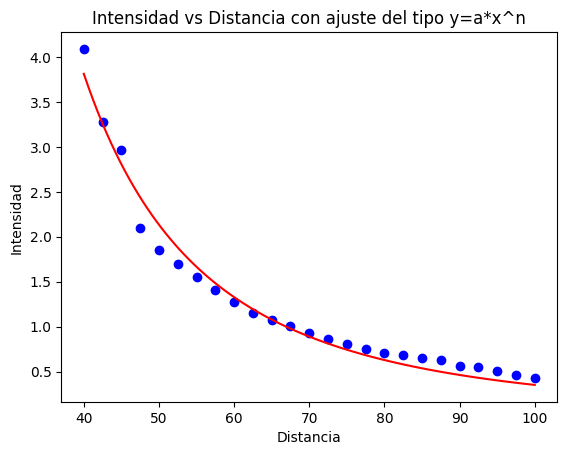

In [26]:
# Graficar los datos 
plt.plot(data['distancia'], data['intensidad'], 'bo', label='Datos')

r_fit = np.linspace(min(r), max(r), 100)
plt.plot(r_fit, func(r_fit, a, n), 'r-', label='Ajuste')

plt.xlabel('Distancia')
plt.ylabel('Intensidad')
plt.title('Intensidad vs Distancia con ajuste del tipo y=a*x^n')
plt.show()